In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PERSON = 1
data = pd.read_csv('../data/train.csv', sep=',')

In [3]:

mean = data.loc[data['id'] == PERSON, 'x'].mean()

In [4]:
data = data[data.id == PERSON]

In [5]:
data

,id,time,x,y
0,1,0,800,0
1,1,780,780,0
2,1,1572,792,0
3,1,2392,820,0
4,1,3196,804,0
...,...,...,...,...
1865,1,1395312,640,0
1866,1,1395684,372,0
1867,1,1395756,72,0
1868,1,1396596,840,0


In [6]:
def normalize(data: pd.DataFrame):

    data[['x', 'time']] = data[['x', 'time']].apply(lambda col: (col - col.min()) / (col.max() - col.min()), axis=0)
    return data

In [7]:
#normalize(data)

In [8]:
from sklearn.neighbors import LocalOutlierFactor
def remove_noises(noise_data):
    lof = LocalOutlierFactor(n_neighbors=15, novelty=True)
    lof.fit(noise_data[['x']].to_numpy())
    outlier_predicted = lof.predict(noise_data[['x']].to_numpy())
    clear_data = noise_data[outlier_predicted == 1].copy()

    return clear_data

In [9]:
data = remove_noises(data)

In [10]:
from main_features.rr_features import StatFeatures
from math import ceil


INTERVALS = 20

person_data = data.copy()

min_tresh = person_data.time.min()
max_tresh = person_data.time.max()

dur_interval = ceil((max_tresh - min_tresh) / INTERVALS)

statistic = list()
anomalies = list()

for interval in range(INTERVALS):
    bot_tresh = interval * dur_interval
    top_tresh = (interval + 1) * dur_interval
    interval_data = person_data.loc[(person_data.time > bot_tresh) & (person_data.time < top_tresh), 'x']
    if len(interval_data) == 0:
        continue

    stat_info = StatFeatures(interval_data, 5)
    statistic.append(stat_info.get_statistic())

    if 1 in person_data.loc[(person_data.time > bot_tresh) & (person_data.time < top_tresh), 'y'].values:
        anomalies.append(1)
    else:
        anomalies.append(0)


In [11]:
new_data = pd.DataFrame(data=statistic,
                        columns=['AM0',
                                 'Mode',
                                 'Std',
                                 'Mean',
                                 'Var',
                                 'p_NN50',
                                 'RMSSD',
                                 'IVR',
                                 'VPR',
                                 'PAPR',
                                 'IDM',
                                 'CAT'
                                 ])
new_data['anomaly'] = anomalies


new_data = new_data.loc[~new_data['AM0'].isin([0])]
new_data

,AM0,Mode,Std,Mean,Var,p_NN50,RMSSD,IVR,VPR,PAPR,IDM,CAT,anomaly
0,37.995873,803.446617,184.206909,703.652174,26.178688,40.659341,229.237820,0.000611,9.846818e-07,0.000961,62.222916,1.240281,0
1,29.756144,925.139394,181.356867,817.766234,22.177104,27.631579,258.404008,0.000551,6.738891e-07,0.000955,71.241860,1.239604,0
2,15.836346,890.144000,286.436091,786.769231,36.406621,48.051948,390.931488,0.000282,6.501237e-07,0.000547,68.240613,0.713914,0
3,127.243837,728.677966,44.437870,759.252747,5.852843,12.222222,33.506218,0.001854,8.577177e-06,0.000407,37.700072,0.787010,1
4,75.948388,752.000000,84.215584,775.777778,10.855632,5.617978,117.244774,0.001142,1.553490e-06,0.001300,69.609904,1.404653,1
5,69.083674,800.000000,123.862986,803.903614,15.407691,14.634146,174.677962,0.001105,1.433486e-06,0.001205,70.512575,1.366927,0
6,61.793785,825.000000,137.790145,831.550000,16.570278,11.392405,163.986415,0.001020,1.284027e-06,0.001167,59.505858,1.617488,0
7,194.114324,721.109091,34.622889,746.553191,4.637699,0.000000,17.670825,0.002800,9.123373e-06,0.000590,25.518993,1.667511,0
8,155.579470,770.985366,32.929721,777.644444,4.234547,8.988764,26.856255,0.002399,7.369554e-06,0.000548,40.778139,1.035413,1
9,166.756945,692.096703,37.408672,714.708333,5.234117,5.263158,28.882338,0.002308,8.209573e-06,0.000587,38.603800,1.052358,0


In [12]:
new_data['color'] = 'g'
new_data.loc[new_data['anomaly'] == 1, 'color'] = 'r'

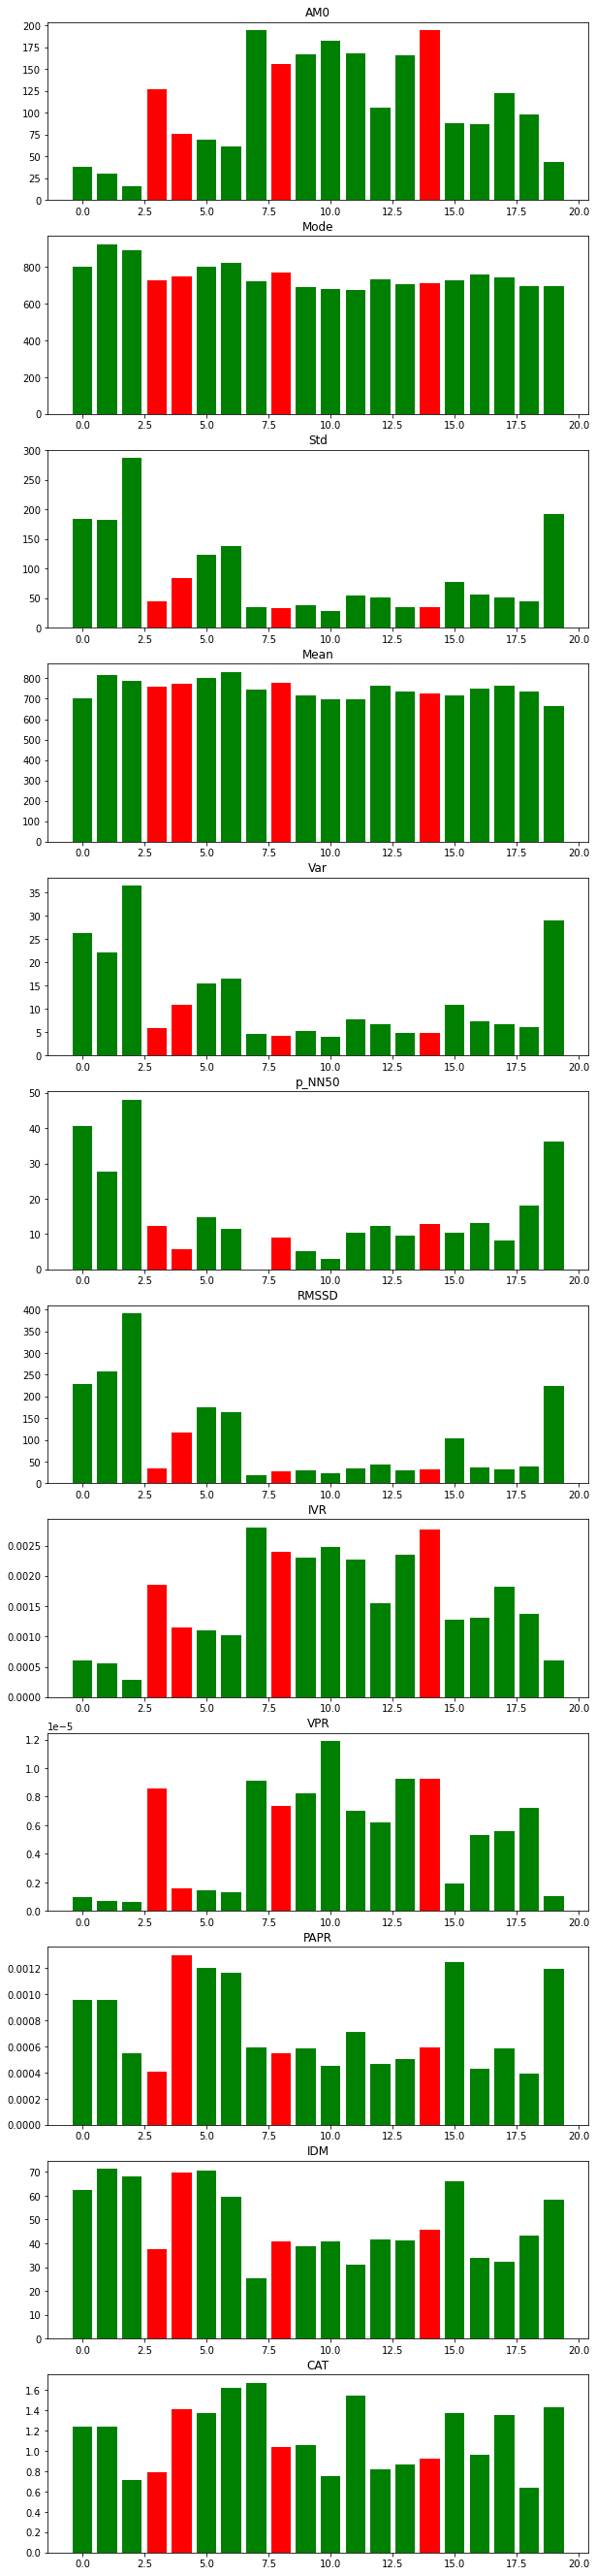

In [13]:
fig, ax = plt.subplots(len(new_data.columns) - 2)
fig.set_figheight((len(new_data.columns) - 2) * 4)
fig.set_figwidth(10)
i = 0
for column in new_data.columns:
    if column not in ['anomaly', 'color']:
        ax[i].set_title(column)
        ax[i].bar([x for x in range(0, new_data.shape[0])],
                            new_data[column].values,
                            color=new_data['color'].values)

        i += 1

fig.savefig('main_features.png')

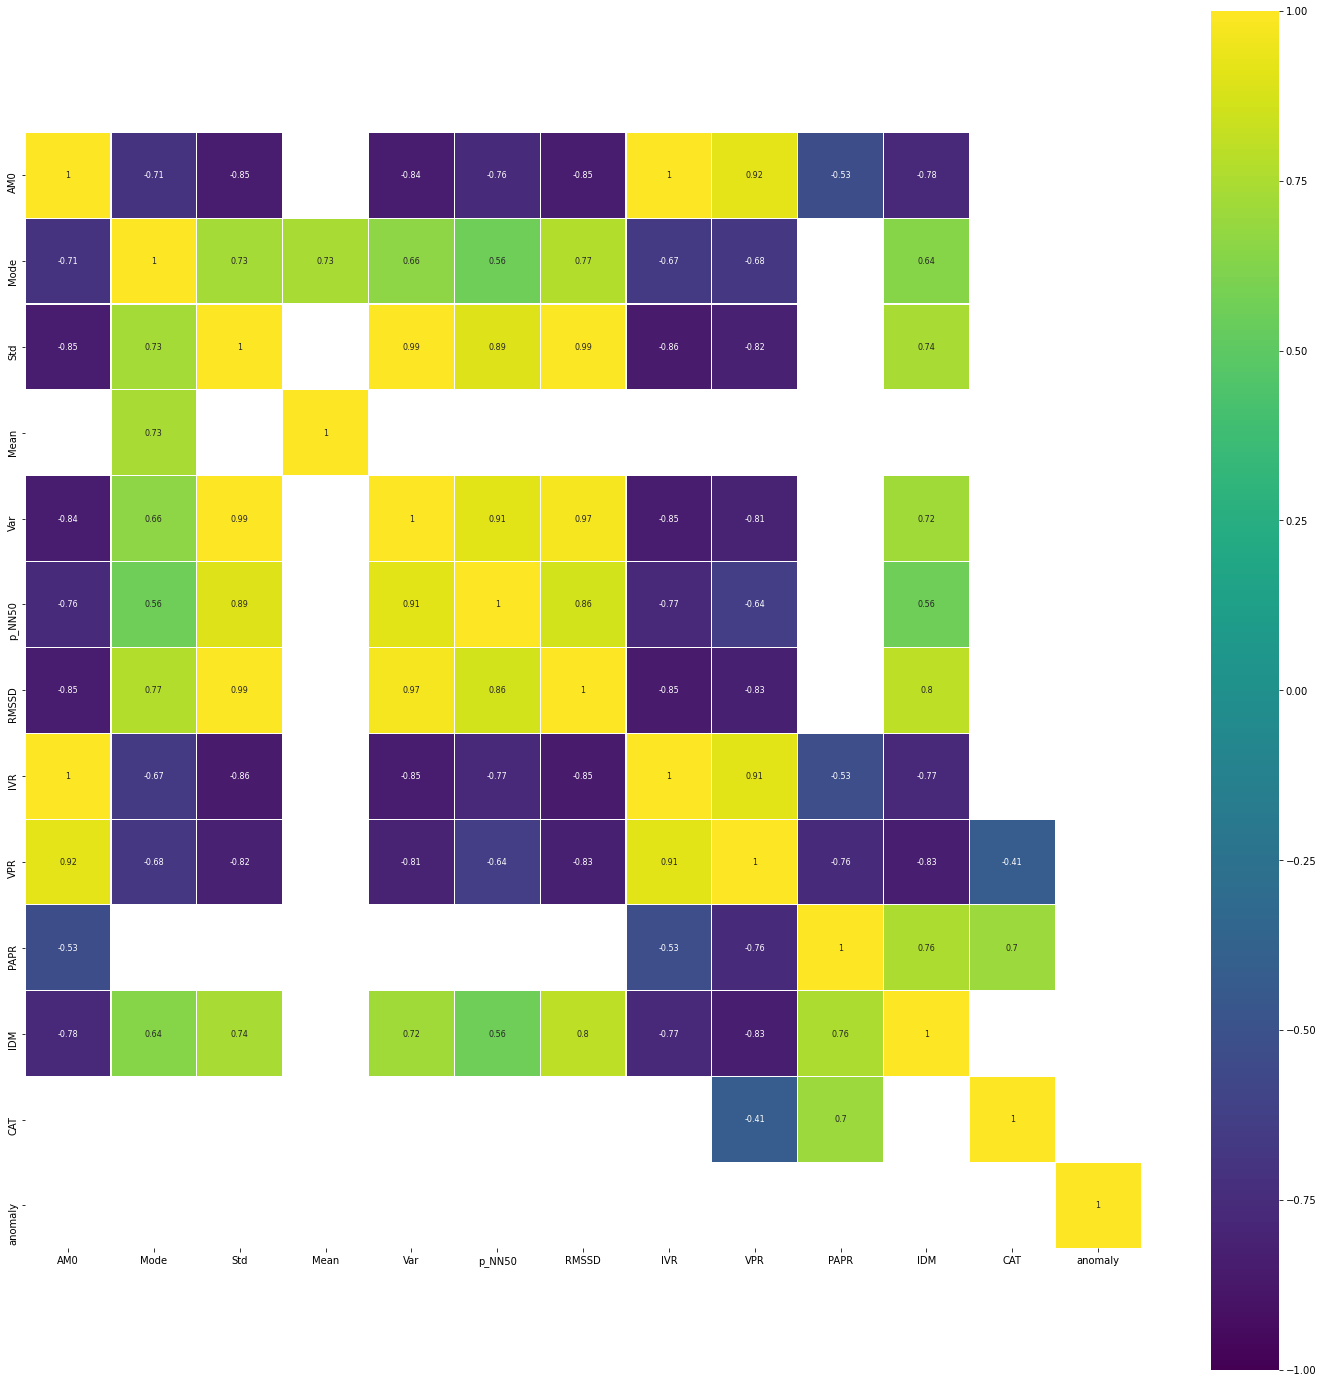

In [14]:
# Все делали по формулам -> корреляция большая
import seaborn as sns
corr_data = new_data.drop(columns=['color']).corr()

plt.figure(figsize=(25, 25))
sns.heatmap(corr_data[(corr_data >= 0.5) | (corr_data <= -0.4)],
       cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
       annot=True, annot_kws={"size": 8}, square=True)

plt.savefig('correlation_map.png')